In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [46]:
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [3]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [74]:
X = torch.linspace(1,-1,100)
X = X.view(-1,1)
Y = X.pow(2)+torch.rand(X.shape)*0.2

In [75]:
X = Variable(X).to(device)
Y = Variable(Y).to(device)

In [5]:
X_test = torch.linspace(1,-1,10)
X_test = X_test.view(-1,1)
Y_test = 3*pow(X_test,4)+1*pow(X_test,3)-pow(X_test,2)+1*X_test+torch.rand(X_test.shape)*0.01

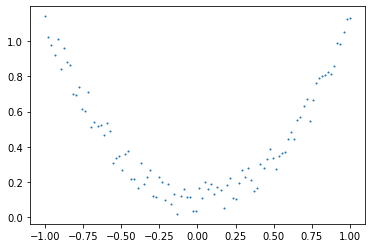

In [68]:
plt.scatter(X.cpu(),Y.cpu(),s=1)

In [59]:
X=X.to(device).requires_grad_()
Y=Y.to(device).requires_grad_()
X_test=X_test.to(device)
Y_test=Y_test.to(device)

In [76]:
class Net(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Net,self).__init__()
        self.in_dim,self.out_dim = input_dim, output_dim
        self.l1 = nn.Sequential(
            nn.Linear(self.in_dim, 1000),
            nn.ReLU())
        self.l2 = nn.Linear(1000,1)
    
    def forward(self,X):
        self.X = self.l1(X)
        self.X = self.l2(self.X)
        return self.X

In [88]:
net = Net(X.shape[1],Y.shape[1])
net.to(device)

Net(
  (l1): Sequential(
    (0): Linear(in_features=1, out_features=1000, bias=True)
    (1): ReLU()
  )
  (l2): Linear(in_features=1000, out_features=1, bias=True)
)

In [89]:
optm = torch.optim.SGD(net.parameters(), lr=0.001)
loss = nn.MSELoss()

In [30]:
from tqdm import tqdm

In [31]:
train_loader = torch.utils.data.DataLoader(dataset=X,
                                           batch_size=10)
                                           

In [90]:
loss_list=[]

In [91]:
# net.train()
for epoc in tqdm(range(10000)):
    res = net(X)
    l = loss(res ,Y)

    net.zero_grad()
    l.backward()
    optm.step()
    if epoc%100==0:
        loss_list.append(l.item())

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1546.62it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

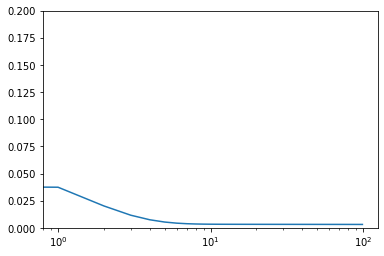

In [94]:
plt.figure()
plt.xscale('log')
plt.ylim((0,0.2))
plt.plot(loss_list)
plt.show

In [124]:
test=torch.linspace(-1,1,50).view(-1,1).to(device)
ite=iter(test)

In [125]:
ydata=[]
with torch.no_grad():
    for i,item in enumerate(ite):
        out=net(item)
        ydata.append(out.cpu())

D:\anaconda3\lib\site-packages\numpy\ma\core.py:2826: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  _data = np.array(data, dtype=dtype, copy=copy,
D:\anaconda3\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


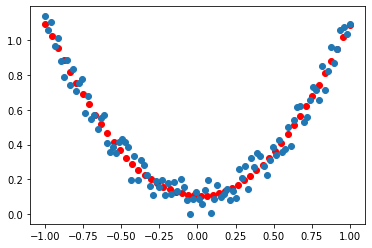

In [129]:
plt.figure()
plt.scatter(test.cpu(),ydata,c='r')
plt.scatter(X.cpu(),Y.cpu())
plt.show()